In [1]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

In [2]:
class CassandraSession:
    def __init__(self,cluster_type='local'):
        self.cluster_type = cluster_type
    
    def get_session(self):
        try:
            if self.cluster_type == 'cloud':
                cloud_config= {
                    'secure_connect_bundle': 'C:\secure-connect-test1.zip'
                }
                auth_provider = PlainTextAuthProvider('MjBJpHWnDiNwqLAcEBLChueW', 'J1LQ8TANSQ7H7g7kZEUhkkT5K.CLeYKq_x4LBmAbf1TKmuY_AYExWYGyLP+-ux4AE6cb4S21vnyk,UNPF.eHaNlMzseZ6C2ZkZaWpzWxmcFF,_Ros__Ia5UtNTtE1ajn')
                cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
                session_cloud = cluster.connect()
                return session_cloud
            else:
                cluster = Cluster()
                session_local = cluster.connect()
                return session_local
        except Exception as e:
            print('Exception occured while connecting ',e)
    

In [3]:
try:
    cassandra = CassandraSession()
    session = cassandra.get_session()
    row = session.execute("select release_version from system.local").one()
    if row:
        print(row[0])
    else:
        print("An error occurred.")
except Exception as e:
    print('exception occurced ',e)

3.11.10


In [12]:
# Create Keyspace
try:
    query = "CREATE KEYSPACE empmgmt WITH replication = {'class':'SimpleStrategy', 'replication_factor' : 3};"
    session.execute(query)
    print('Keyspace created.')
except Exception as e:
    print('excetion occured ',e)

Keyspace created.


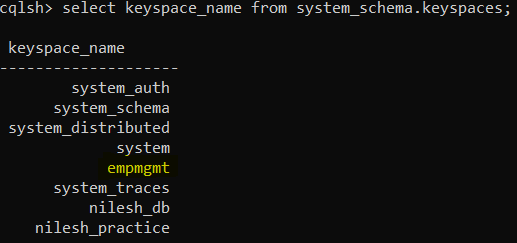

In [15]:
# Use Keyspace
try:
    query = "USE empmgmt"
    session.execute(query)
    print('Changed keypsace to empmgmt')
except Exception as e:
    print('excetion occured ',e)

Changed keypsace to empmgmt


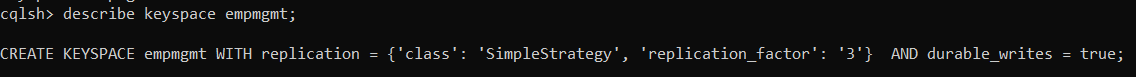

In [9]:
# Alter Keyspace
try:
    query = "ALTER KEYSPACE empmgmt WITH replication = {'class':'SimpleStrategy', 'replication_factor' : 2};"
    session.execute(query)
    print('Keyspace altered.')
except Exception as e:
    print('excetion occured ',e)

Keyspace altered.


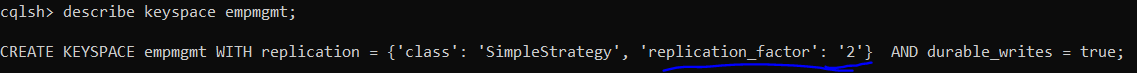

In [10]:
# Drop keyspace
try:
    query = "DROP KEYSPACE empmgmt"
    session.execute(query)
    print('Keyspace empmgmt dropped.')
except Exception as e:
    print('excetion occured ',e)

Keyspace empmgmt dropped.


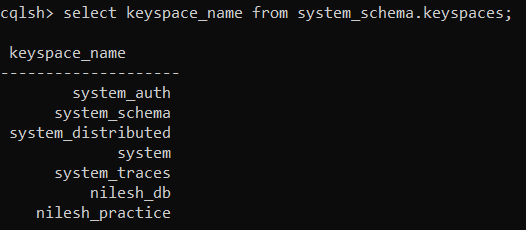

In [35]:
# Creating Table
try:
    query = """CREATE TABLE Employee( 
               emp_id int PRIMARY KEY,
               emp_name text,
               emp_city text,
               emp_sal varint,
               emp_phone varint)
            """
    session.execute(query)
    print('Table created.')
except Exception as e:
    print('excetion occured ',e)


Table created.


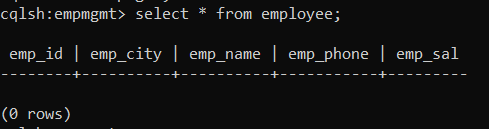

In [20]:
# Alter Table add column
try:
    query = "ALTER TABLE Employee ADD email set<text>"
    session.execute(query)
    print('Table altered.')
except Exception as e:
    print('excetion occured ',e)

Table altered.


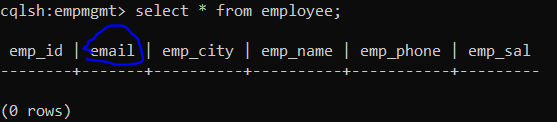

In [21]:
# Alter Table drop column
try:
    query = "ALTER TABLE Employee DROP email"
    session.execute(query)
    print('Table altered.')
except Exception as e:
    print('excetion occured ',e)

Table altered.


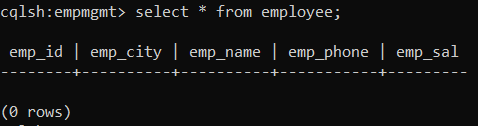

In [18]:
# Drop Table
try:
    query = "DROP TABLE Employee"
    session.execute(query)
    print('Table dropped.')
except Exception as e:
    print('excetion occured ',e)

Table dropped.


In [22]:
# Creating index on table
try:
    query = "CREATE INDEX emp_index on Employee(emp_city)"
    session.execute(query)
    print('Index created.')
except Exception as e:
    print('excetion occured ',e)

Index created.


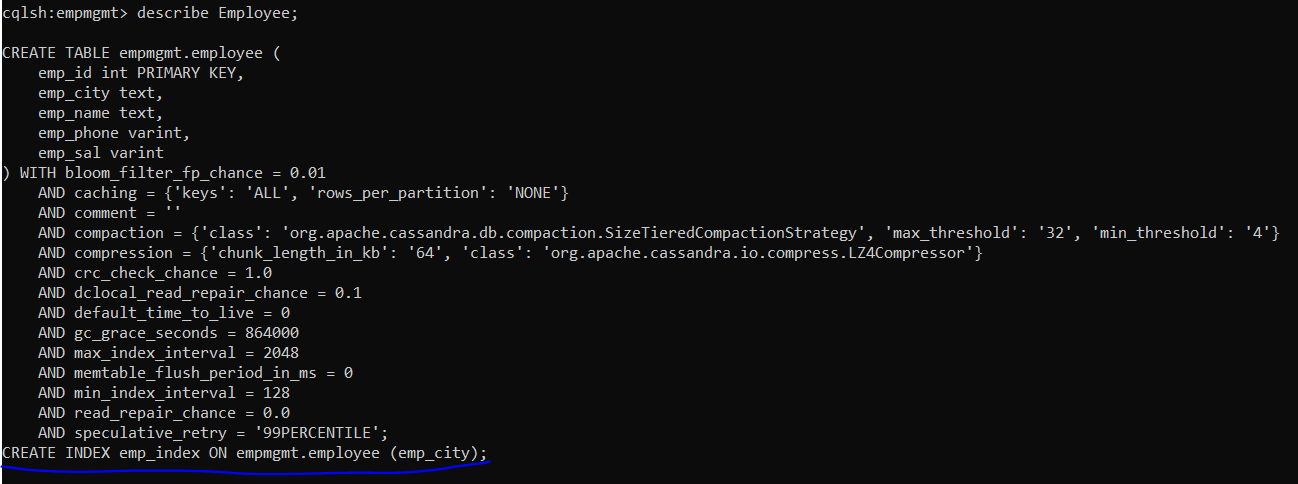

In [37]:
# Insert into table
try:
    records = [(1,'Nilesh','Pune',7709224868,20000),(2,'Nikhil','Mumabi',9828563214,200000),
    (3,'Nilaya','chennai',9848022330,50000),(4,'rajeev','Pune',9848022331,30000)]
    for record in records:
        query = """ INSERT INTO employee (emp_id, emp_name, emp_city,emp_phone, emp_sal) VALUES(%s,%s,%s,%s,%s)"""
        session.execute(query,record)
        print(f'Record {record} inserted.')
except Exception as e:
    print('excetion occured ',e)

Record (1, 'Nilesh', 'Pune', 7709224868, 20000) inserted.
Record (2, 'Nikhil', 'Mumabi', 9828563214, 200000) inserted.
Record (3, 'Nilaya', 'chennai', 9848022330, 50000) inserted.
Record (4, 'rajeev', 'Pune', 9848022331, 30000) inserted.


In [38]:
# Display records from table
try:
    query = "SELECT * FROM Employee"
    rows = session.execute(query)
    for row in rows:
        print(row)
except Exception as e:
    print('excetion occured ',e)

Row(emp_id=1, emp_city='Pune', emp_name='Ravi Sonawane', emp_phone=7709224868, emp_sal=20000)
Row(emp_id=2, emp_city='Mumabi', emp_name='Pravin', emp_phone=9828563214, emp_sal=200000)
Row(emp_id=4, emp_city='Pune', emp_name='rajeev', emp_phone=9848022331, emp_sal=30000)
Row(emp_id=3, emp_city='chennai', emp_name='rahman', emp_phone=9848022330, emp_sal=50000)


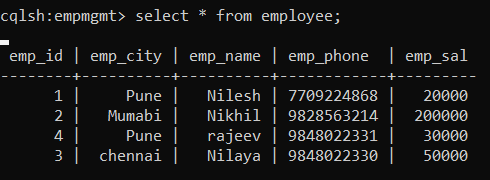

In [24]:
# Display required columns from table
try:
    query = "SELECT emp_id,emp_name,emp_city FROM Employee"
    rows = session.execute(query)
    for row in rows:
        print(row)
except Exception as e:
    print('excetion occured ',e)

Row(emp_id=1, emp_name='Nilesh', emp_city='Pune')
Row(emp_id=2, emp_name='Nikhil', emp_city='Mumabi')
Row(emp_id=4, emp_name='rajeev', emp_city='Pune')
Row(emp_id=3, emp_name='Nilaya', emp_city='chennai')


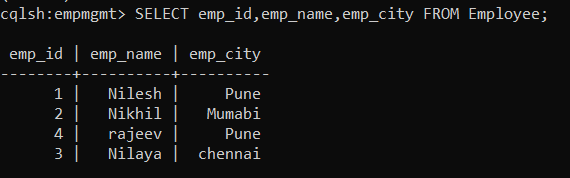

In [25]:
# Display employess whose emp_sal 50000 using ALLOW FILTERING;
try:
    query = "SELECT emp_id,emp_name,emp_city FROM Employee WHERE emp_sal >50000 ALLOW FILTERING"
    rows = session.execute(query)
    for row in rows:
        print(row)
except Exception as e:
    print('excetion occured ',e)

Row(emp_id=2, emp_name='Nikhil', emp_city='Mumabi')


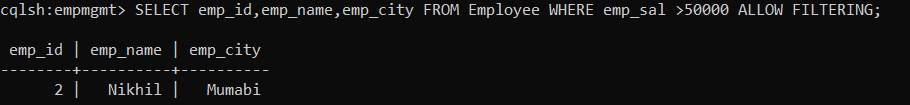

In [26]:
# Display employee count in table
try:
    query = "SELECT count(*) as emp_count from Employee"
    rows = session.execute(query)
    for row in rows:
        print(row)
except Exception as e:
    print('excetion occured ',e)

Row(emp_count=4)


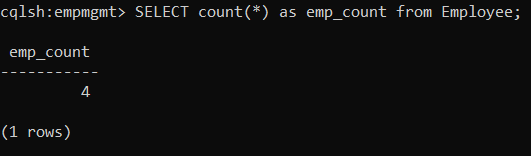

In [27]:
# Update record from table
try:
    query = "UPDATE Employee SET emp_name='Nilesh_NEW' WHERE emp_id=1"
    session.execute(query)
    print('record updated')
except Exception as e:
    print('excetion occured ',e)

record updated


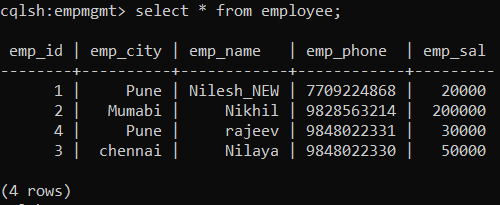

In [28]:
# Deleting record from table
try:
    query = "DELETE FROM Employee WHERE emp_id=1"
    session.execute(query)
    print('record deleted')
except Exception as e:
    print('excetion occured ',e)

record deleted


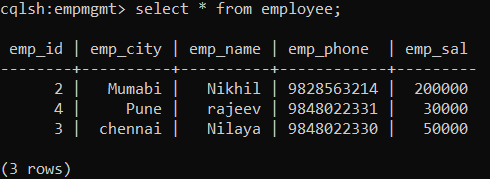

In [33]:
# Truncate table
try:
    query = "TRUNCATE TABLE  Employee"
    session.execute(query)
    print('Table truncated.')
except Exception as e:
    print('excetion occured ',e)

Table truncated.


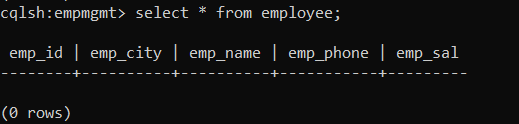

In [36]:
# Alter table
# Alter Table add column
try:
    query = "ALTER TABLE Employee ADD email set<text>"
    session.execute(query)
    print('Table altered.')
except Exception as e:
    print('excetion occured ',e)

Table altered.


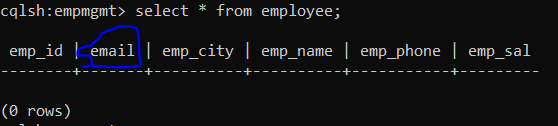

In [38]:
# Update table to add emails
try:
    emails = {'neel@gail.com','neel1@gmail.com','neel2@gmail.com'}
    query = "UPDATE Employee SET email={} WHERE emp_id=1".format(emails)
    session.execute(query)
    print('record updated')
except Exception as e:
    print('excetion occured ',e)

record updated


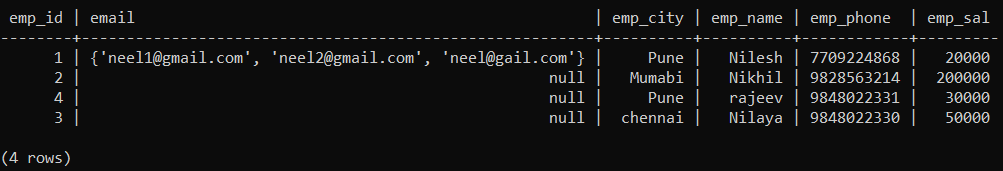